In [47]:
import re
def extract_bbox_from_text(result_text):
    """
    从生成的文本中提取预测的边界框
    :param result_text: 生成的文本，其中包含边界框信息
    :return: 提取出的边界框，格式为 [xmin, ymin, xmax, ymax]，或空列表如果未找到
    """
    # 定义正则表达式模式以匹配边界框
    pattern = r"\[\s*(0(\.\d+)?|1(\.0+)?)\s*,\s*(0(\.\d+)?|1(\.0+)?)\s*,\s*(0(\.\d+)?|1(\.0+)?)\s*,\s*(0(\.\d+)?|1(\.0+)?)\s*\]"
    match = re.search(pattern, result_text)
    print([float(match.group(i)) for i in range(1, 11, 3)])
    print(match.group(10))
    if match:

        bbox = [float(match.group(i)) for i in range(1, 9, 2)]
        return bbox
    else:
        # 如果未找到匹配的边界框
        print("No bbox found in text")
        return None
rs = "The object mentioned in the expression is the person at the bottom left of the image. The bounding box coordinates of this person are:[0.032,0.444,0.234,0.844]<|eot_id|>"
predicted_bbox = extract_bbox_from_text(rs)

[0.032, 0.444, 0.234, 0.844]
0.844


TypeError: float() argument must be a string or a real number, not 'NoneType'

In [ ]:

def normalize_bbox(self, bbox, w, h):
    # 计算左上和右下坐标
    x, y, width, height = bbox
    xmin = x
    ymin = y
    xmax = x + width
    ymax = y + height

    # 归一化
    xmin_norm = xmin / w
    ymin_norm = ymin / h
    xmax_norm = xmax / w
    ymax_norm = ymax / h

    return [xmin_norm, ymin_norm, xmax_norm, ymax_norm]


In [1]:
import pandas as pd
csv_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/eval/refcoco/result_files/refcoco/testA/tesA_base_lora_no.csv'
csvdf = pd.read_csv(csv_path)



In [ ]:
def norm2pixel():
    pass

tensor([0.0050, 0.3740, 0.2490, 0.8630])
tensor([  3.2400, 159.3100, 156.4000, 312.8100])
[0.0, 0.125, 0.998, 0.875] [0.0, 0.125, 0.998, 0.875]
person bottom left


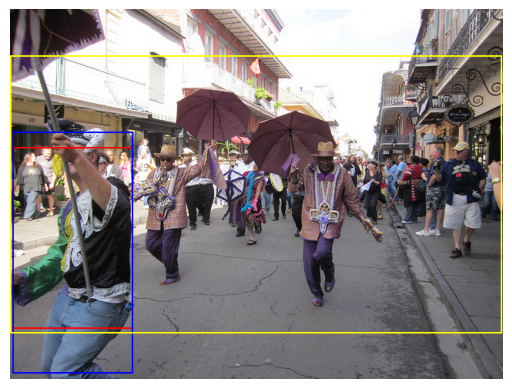

tensor([0.6030, 0.4930, 0.7970, 0.8140])
tensor([385.7900, 208.0700, 123.9700, 205.1700])
[0.644, 0.452, 0.806, 0.844] [0.644, 0.452, 0.806, 0.844]
man on right


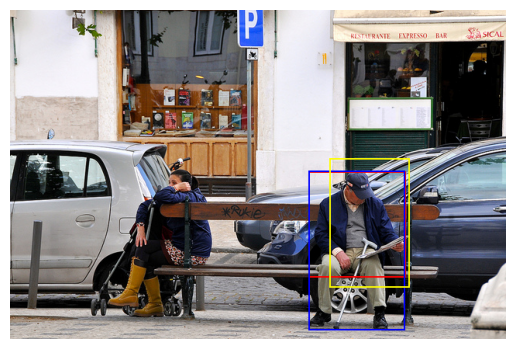

tensor([0.1960, 0.4920, 0.4140, 0.7930])
tensor([125.7500, 207.3000, 139.3200, 192.4100])
[0.244, 0.444, 0.364, 0.794] [0.244, 0.444, 0.364, 0.794]
person left


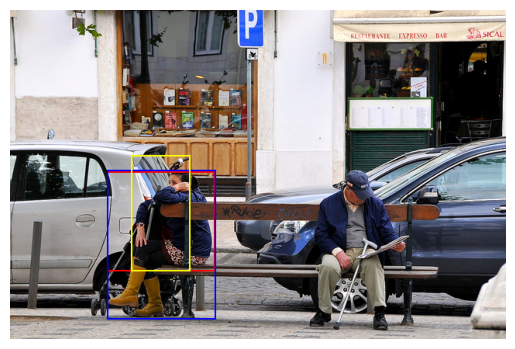

tensor([0.4920, 0.4280, 1.0000, 0.7810])
tensor([315.1700, 166.1800, 324.8300, 226.3500])
[0.0, 0.166, 0.998, 0.83] [0.0, 0.166, 0.998, 0.83]
blue car


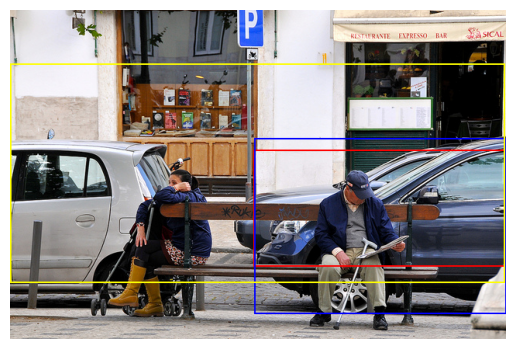

tensor([0.0000, 0.4230, 0.3320, 0.7570])
tensor([  0.0000, 163.4000, 212.7200, 213.4500])
[0.0, 0.409, 0.3, 0.769] [0.0, 0.409, 0.3, 0.769]
white car left


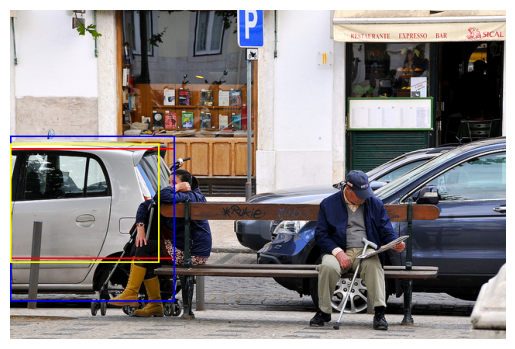

tensor([0.1840, 0.3920, 0.3930, 0.7180])
tensor([117.7500, 143.6000, 134.0200, 208.6900])
[0.0, 0.166, 0.998, 0.83] [0.0, 0.166, 0.998, 0.83]
Man on far left on screen


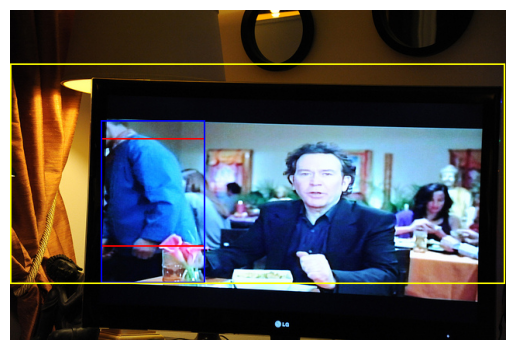

tensor([0.3740, 0.4320, 0.7870, 0.7400])
tensor([239.3300, 169.4400, 264.2100, 197.2100])
[0.444, 0.43, 0.698, 0.698] [0.444, 0.43, 0.698, 0.698]
main guy on the tv


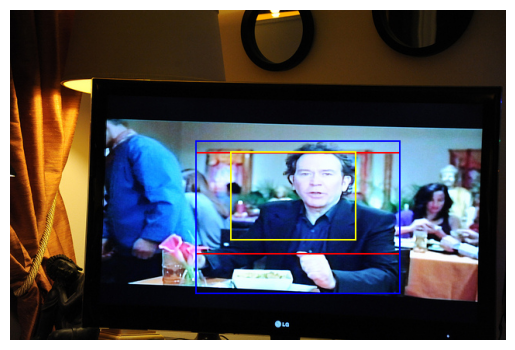

tensor([0.0960, 0.2460, 0.4370, 0.8750])
tensor([ 61.5900,  77.3900, 217.7800, 402.6100])
[0.125, 0.206, 0.364, 0.872] [0.125, 0.206, 0.364, 0.872]
left


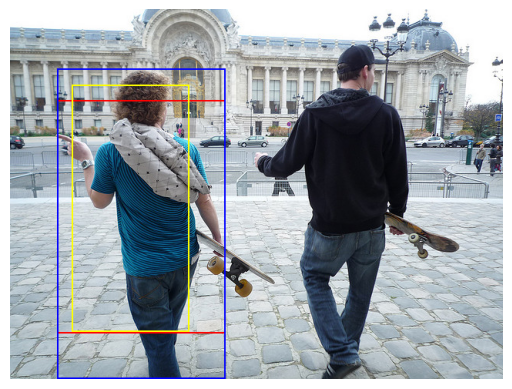

tensor([0.4970, 0.1940, 0.8090, 0.8750])
tensor([318.0900,  44.0000, 199.6500, 436.0000])
[0.598, 0.206, 0.772, 0.866] [0.598, 0.206, 0.772, 0.866]
guy on right


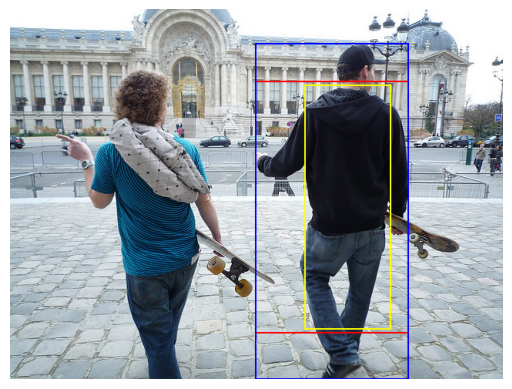

tensor([0.4750, 0.2450, 0.5880, 0.7650])
tensor([171.2800, 156.9700,  72.2600, 332.6100])
[0.166, 0.242, 0.234, 0.736] [0.166, 0.242, 0.234, 0.736]
the old lady in between the players


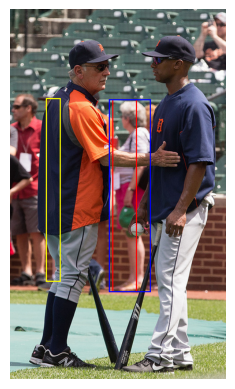

In [5]:
from ref_test import RefDataset, IoUEvaluator
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import torch
import ast
from torch.utils.data import DataLoader

# 假设数据集路径和 DataLoader 已经设置好
path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/eval/refcoco/refer/data/refcoco/testA-00000-of-00001.parquet'
dataset = RefDataset(path)
data_loader = DataLoader(dataset, batch_size=10, shuffle=False)

i = 0
for index, batch in enumerate(data_loader):
    annotations, images, true_bboxes, image_paths, bboxes = batch
    for image, annotation, true_bbox, image_path, bbox in zip(images, annotations, true_bboxes, image_paths, bboxes):
        
        predicted_bbox_str = csvdf.loc[i, 'predicted_bbox']
        predicted_bbox = ast.literal_eval(predicted_bbox_str)
        print(true_bbox)
        print(bbox)
        print(predicted_bbox_str, predicted_bbox)
        print(annotation)
        pil_image = Image.open(image_path)
        draw = ImageDraw.Draw(pil_image)

        img_w, img_h = pil_image.size
        
        # 标准化边界框是归一化坐标 `(xmin, ymin, xmax, ymax)`
        xmin_norm = true_bbox[0].item() * img_w
        ymin_norm = true_bbox[1].item() * img_h
        xmax_norm = true_bbox[2].item() * img_w
        ymax_norm = true_bbox[3].item() * img_h

        # 未归一化边界框 `(x, y, w, h)` -> `(xmin, ymin, xmax, ymax)`
        x = bbox[0].item()
        y = bbox[1].item()
        w = bbox[2].item()
        h = bbox[3].item()

        xmin_unscaled = x
        ymin_unscaled = y
        xmax_unscaled = x + w
        ymax_unscaled = y + h

        # 预测坐标
        xmin = predicted_bbox[0] * img_w
        ymin = predicted_bbox[1] * img_h
        xmax = predicted_bbox[2] * img_w
        ymax = predicted_bbox[3] * img_h
        # 在图像上绘制边框
        draw.rectangle([xmin_norm, ymin_norm, xmax_norm, ymax_norm], outline='red', width=2)  # 标准化的边界框
        draw.rectangle([xmin_unscaled, ymin_unscaled, xmax_unscaled, ymax_unscaled], outline='blue', width=2)  # 未归一化的边界框
        draw.rectangle([xmin,ymin,xmax,ymax], outline='yellow', width=2)  # 标准化的边界框

        # 显示图像（不同颜色表示不同框）
        plt.imshow(pil_image)
        plt.axis('off')
        plt.show()
        i += 1
        # break  # 只显示第一张
    break  # 只分析第一个批次